In [1]:
"""
Implements WDGRL with clustering
Wasserstein Distance Guided Representation Learning, Shen et al. (2017)
"""

###library loading###
import argparse
import random
import torch
import numpy as np
from torch import nn
import math
import pandas as pd
import os
import sys
sys.path.insert(0, '../../')
import itertools
from torch.autograd import grad
from torch.utils.data import DataLoader,Subset
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor
import torch.nn.functional as F
from tqdm import tqdm, trange
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from torchvision import datasets, transforms
from data.mnist_mnistm_data import *
from torch.nn.utils import spectral_norm
from models.model_mnist_mnistm import *
import utils.config as config
from utils.helper import *
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
half_batch = 1024

source_dataset = load_mnistm_LS(target_num=1800,MNISTM=MNISTM,train_flag=True)
source_loader = DataLoader(source_dataset, batch_size=half_batch, drop_last=True,\
                           shuffle=True, num_workers=0, pin_memory=True)

##########target data########################
target_dataset_label = load_mnist_LS(source_num=290,train_flag=False)

print(len(target_dataset_label))

target_loader = DataLoader(target_dataset_label, batch_size=half_batch,drop_last=True,\
                           shuffle=True, num_workers=1, pin_memory=True)

5800


In [4]:
source_batch_iterator = iter(source_loader)
target_batch_iterator = iter(target_loader)
len_dataloader = min(len(source_loader), len(target_loader))

total_unweight_clf_loss = 0
total_clf_loss = 0
total_centroid_loss = 0
total_sntg_loss = 0
total_w1_loss = 0


for i in range(len_dataloader):
    data_source = source_batch_iterator.next()
    source_x, source_y = data_source
    data_target = target_batch_iterator.next()
    target_x, _ = data_target
    source_x, target_x = source_x.to(device), target_x.to(device)

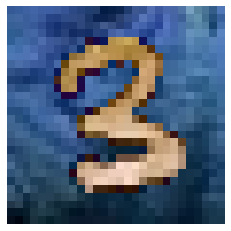

In [89]:
import matplotlib.pyplot as plt
npimg = source_x[9].cpu().numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
plt.axis('off')
#plt.savefig('mnistm3.png')

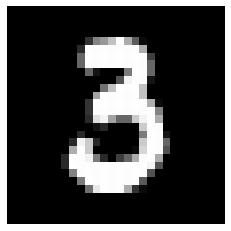

In [95]:
i = 5
npimg = target_x[i].cpu().numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
plt.axis('off')
plt.savefig('mnist3.png')